## EDA

Analisis exploratorio de los datos (Por sus siglas en inglés)

Se importan las bibliotecas que se van a utilizar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymysql
from sqlalchemy import create_engine

Se realiza el cargue de los conjuntos de datos.

In [2]:
hechos= pd.read_excel('../Datasets/homicidios_HECHOS.xlsx')
victimas= pd.read_excel('../Datasets/homicidios_VICTIMAS.xlsx')

In [ ]:
poblacion= pd.read_excel('../Datasets/poblacion.xlsx')

### Visualizamos los datos por comunas

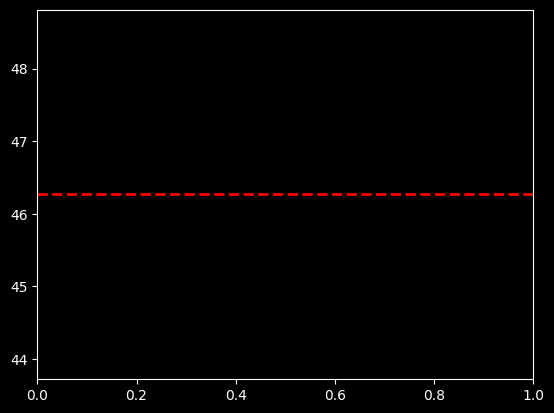

In [12]:
# Añadir línea con la media
mean_line = hechos['COMUNA'].value_counts().mean()
plt.axhline(mean_line, color='red', linestyle='dashed', linewidth=2, label='Media')

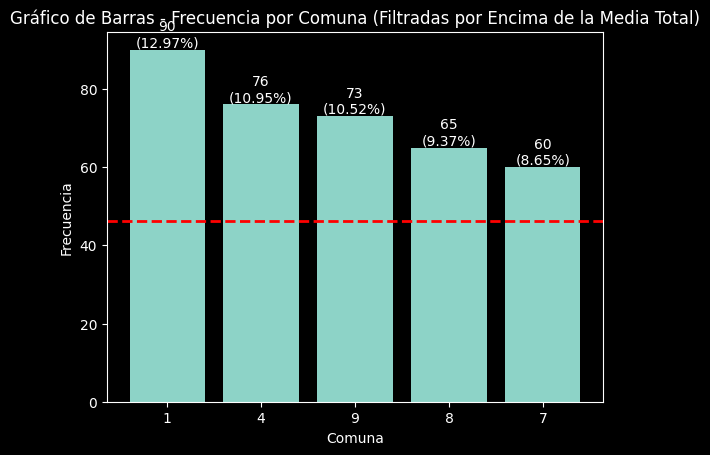

El promedio de accidentes por comuna es de 46.27 accidentes, estas comunas priorizadas representan el 52.45% del total.


In [28]:
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'

# Obtener el conteo de frecuencia para cada Comuna sin filtrar
conteo_por_comuna = hechos['COMUNA'].value_counts()

# Calcular el promedio total sin filtrar
mean_line_total = conteo_por_comuna.mean()

# Filtrar las comunas que tienen frecuencias por encima del promedio total
comunas_filtradas = conteo_por_comuna[conteo_por_comuna > mean_line_total]

# Ordenar en forma descendente por comuna 
conteo_por_comuna_filtradas = comunas_filtradas.sort_values(ascending=False)

# Obtener las etiquetas (nombres de las comunas) y sus frecuencias filtradas
comunas = conteo_por_comuna_filtradas.index
frecuencias = conteo_por_comuna_filtradas.values

# Crear el gráfico de barras con colores personalizados y etiquetas en el eje X
fig, ax = plt.subplots()
bars = plt.bar(range(len(comunas)), frecuencias, tick_label=comunas)

# Añadir línea con la media total sin filtrar
plt.axhline(mean_line_total, color='red', linestyle='dashed', linewidth=2, label='Media Total')

# Agregar etiquetas y título
plt.xlabel('Comuna')
plt.ylabel('Frecuencia')
plt.title('Gráfico de Barras - Frecuencia por Comuna (Filtradas por Encima de la Media Total)')

# Añadir texto con la cantidad y el porcentaje total en cada barra
for bar, frecuencia in zip(bars, frecuencias):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{frecuencia}\n({frecuencia/len(hechos)*100:.2f}%)', ha='center', va='bottom', color='white')

# Mostrar el gráfico
plt.show()
print(f"El promedio de accidentes por comuna es de {mean_line_total:.2f} accidentes, estas comunas priorizadas representan el {(sum(conteo_por_comuna_filtradas)/sum(conteo_por_comuna))*100:.2f}% del total.")


Se están representando gráficamente únicamente las comunas cuyas frecuencias superan el promedio, con el objetivo de enfocarnos en estas áreas específicas. A continuación, generaremos tablas que destaque las principales vías donde ocurren los siniestros, con el fin de identificar puntos críticos.

In [37]:
# Se Calcula el total de filas del DataFrame de comunas priorizadas
total_filas_filtradas = len(df_filtrado)

# Se calculan las frecuencias de 'TIPO_DE_CALLE'
frecuencias_tipo_calle = df_filtrado['TIPO_DE_CALLE'].value_counts()

# Se calcula el peso porcentual
peso_porcentual_tipo_calle = frecuencias_tipo_calle / total_filas_filtradas * 100

# Se redondea a dos digitos despues de la coma
peso_porcentual_tipo_calle =peso_porcentual_tipo_calle.round(2)

# Le agregamos el símbolo de porcentaje a la columna 'Peso Porcentual'
peso_porcentual_tipo_calle_con_simbolo = peso_porcentual_tipo_calle.astype(str) + '%'

# Se crea un nuevo DataFrame con las columnas 'TIPO_DE_CALLE', 'Frecuencia' y 'Peso Porcentual'
df_resultado_tipo_calle = pd.DataFrame({'Frecuencia': frecuencias_tipo_calle.values, 'Peso Porcentual': peso_porcentual_tipo_calle_con_simbolo})

# Imprimir el nuevo DataFrame como una tabla
print(df_resultado_tipo_calle)


               Frecuencia Peso Porcentual
TIPO_DE_CALLE                            
AVENIDA               205          57.75%
GRAL PAZ               65          18.31%
CALLE                  50          14.08%
AUTOPISTA              35           9.86%


Se puede observar que casi del 60% de los accidentes se presenta en las avenidas, esto es en las comunas priorizadas.

Ahora haremos una visualización por tipo de victima

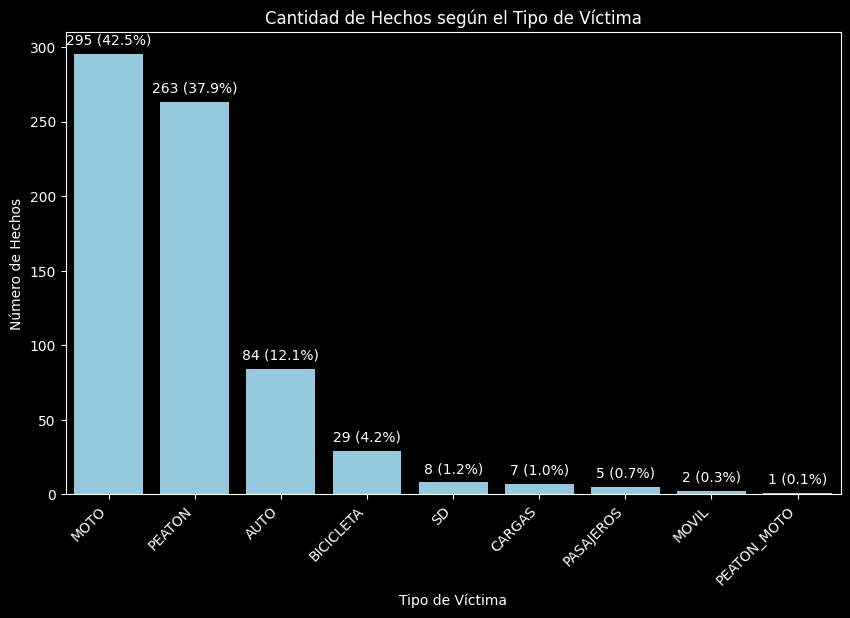

In [38]:
# Se obtendran los datos
conteo_por_victima = hechos['VICTIMA'].value_counts().reset_index(name='Conteo')

# Se calculan los porcentajes
conteo_por_victima['Porcentaje'] = (conteo_por_victima['Conteo'] / conteo_por_victima['Conteo'].sum()) * 100

# Se grafica en barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='VICTIMA', y='Conteo', data=conteo_por_victima, color='skyblue')

# Se agregan los porcentajes dentro de las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f} ({p.get_height() / conteo_por_victima["Conteo"].sum() * 100:.1f}%)',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='white')

# Se completara la informacion del gráfico
plt.xlabel('Tipo de Víctima')
plt.ylabel('Número de Hechos')
plt.title('Cantidad de Hechos según el Tipo de Víctima')
plt.xticks(rotation=45, ha='right')

# Se imprime el gráfico
plt.show()

Se pudo identificar que el tipo de victima con mayor relevancia esta en los motociclistas y los peatones que por paretto tenemoscasi un 80% de los casos, esto nos ayudara a tener un poco mas claridad acerca de la recurrencia de los hechos.

Se elaborara una visualizacion por año

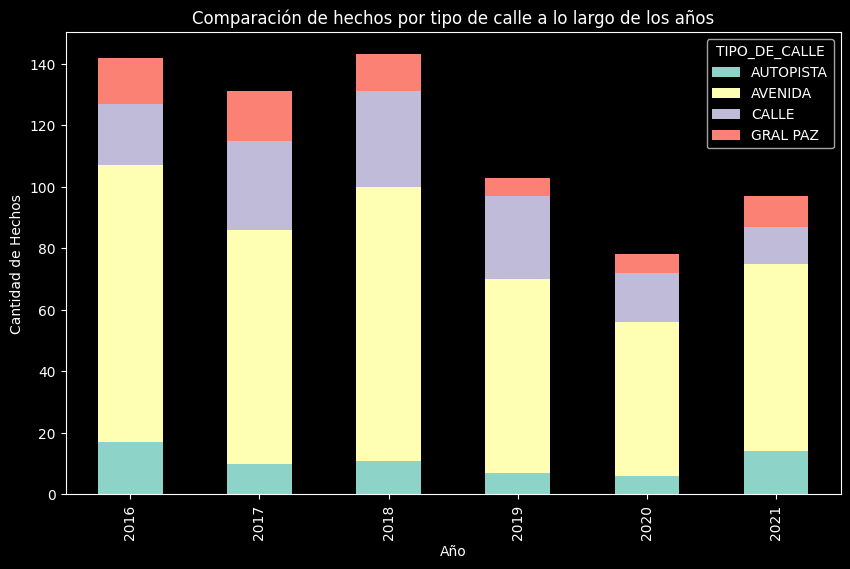

In [39]:
# Se obtiene la serie con la cuenta de hechos por tipo de calle y año
conteo_por_año = hechos.groupby(['AAAA', 'TIPO_DE_CALLE']).size().unstack()

# Se crea un gráfico de barras apiladas
conteo_por_año.plot(kind='bar', stacked=True, figsize=(10, 6))

# Se añade título y etiquetas
plt.title('Comparación de hechos por tipo de calle a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Hechos')

# Se imprime el gráfico
plt.show()


Se puede observar que se han tomado medidas que han permitido reducir los sinisestros, reduciendolos en un 40% aproximadamente.